# **NumPy-Based Exploratory Data Analysis Engine**

This notebook demonstrates a custom EDA engine implemented using NumPy.

The objective is to understand how statistical summaries and correlation
analysis can be computed directly from matrix operations,
without relying on high-level libraries like pandas or scikit-learn.


### **Why Avoid Pandas?**

The goal of this implementation is to understand how statistical
operations are computed internally rather than relying on high-level
abstractions. 

This forces clarity on matrix operations and numerical behavior.

In [1]:
import sys
import os

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, "..")) 

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from src.loader import load_wine_data, split_features_target
from src.analysis import EDAEngine

data = load_wine_data("../data/winequality-red.csv")
print("Dataset Shape:", data.shape)

Dataset Shape: (1599, 12)


## **Data Validation Check**

Before running analysis, we verify:
- Dataset shape
- Feature-target split correctness
- Presence of NaN values

In [ ]:
# Splitting into features and target
X, y = split_features_target(data)

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Checking NaN values
print("Any NaN in X:", (X != X).sum())
print("Any NaN in y:", (y != y).sum())

Feature shape: (1599, 11)
Target shape: (1599, 1)
Any NaN in X: 0
Any NaN in y: 0


In [4]:
X, y = split_features_target(data)

print("Feature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Matrix Shape: (1599, 11)
Target Shape: (1599, 1)


In [5]:
feature_names = [
    "fixed_acidity",
    "volatile_acidity",
    "citric_acid",
    "residual_sugar",
    "chlorides",
    "free_sulfur_dioxide",
    "total_sulfur_dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

In [6]:
engine = EDAEngine(X, feature_names=feature_names)

### **Descriptive Statistics**

We compute column-wise descriptive statistics manually
to validate our implementation against NumPy's built-ins.

The goal here is not performance - but clarity of computation.

In [7]:
summary = engine.descriptive_summary()

for feature, stats in summary.items():
    print(f"\nFeature: {feature}")
    for k, v in stats.items():
        print(f"  {k}: {v:.4f}")


Feature: fixed_acidity
  mean: 8.3196
  variance: 3.0295
  std: 1.7406
  min: 4.6000
  max: 15.9000

Feature: volatile_acidity
  mean: 0.5278
  variance: 0.0320
  std: 0.1790
  min: 0.1200
  max: 1.5800

Feature: citric_acid
  mean: 0.2710
  variance: 0.0379
  std: 0.1947
  min: 0.0000
  max: 1.0000

Feature: residual_sugar
  mean: 2.5388
  variance: 1.9867
  std: 1.4095
  min: 0.9000
  max: 15.5000

Feature: chlorides
  mean: 0.0875
  variance: 0.0022
  std: 0.0471
  min: 0.0120
  max: 0.6110

Feature: free_sulfur_dioxide
  mean: 15.8749
  variance: 109.3465
  std: 10.4569
  min: 1.0000
  max: 72.0000

Feature: total_sulfur_dioxide
  mean: 46.4678
  variance: 1081.4256
  std: 32.8850
  min: 6.0000
  max: 289.0000

Feature: density
  mean: 0.9967
  variance: 0.0000
  std: 0.0019
  min: 0.9901
  max: 1.0037

Feature: pH
  mean: 3.3111
  variance: 0.0238
  std: 0.1543
  min: 2.7400
  max: 4.0100

Feature: sulphates
  mean: 0.6581
  variance: 0.0287
  std: 0.1695
  min: 0.3300
  max: 2.0

## **Observations:**

- Alcohol shows relatively high variance compared to many features.
- Residual sugar appears slightly right-skewed.
- Density has very low variance, indicating narrow spread.

These patterns will be useful when modeling later.


### **Relational Analysis**

We compute the covariance matrix first,
then derive the Pearson correlation matrix from it.

This ensures mathematical transparency instead of
using high-level black-box utilities.

In [8]:
relations = engine.relational_analysis()

cov_matrix = relations["covariance"]
corr_matrix = relations["correlation"]

print("Covariance Matrix Shape:", cov_matrix.shape)
print("Correlation Matrix Shape:", corr_matrix.shape)

Covariance Matrix Shape: (11, 11)
Correlation Matrix Shape: (11, 11)


**At this stage, we have computed all numerical summaries.**

**Next, we visualize feature distributions and inter-feature relationships**
**to identify potential patterns before model building.**

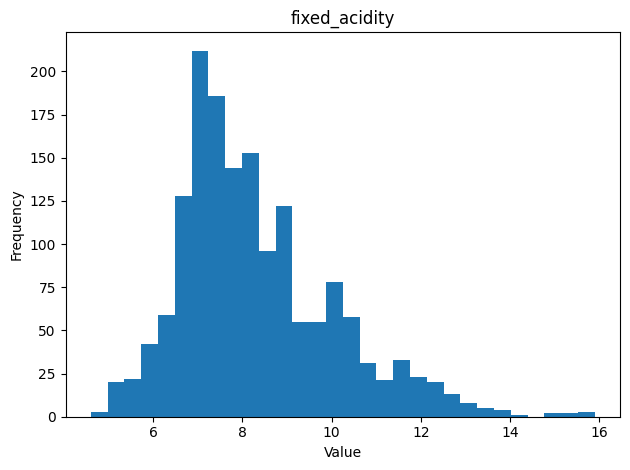

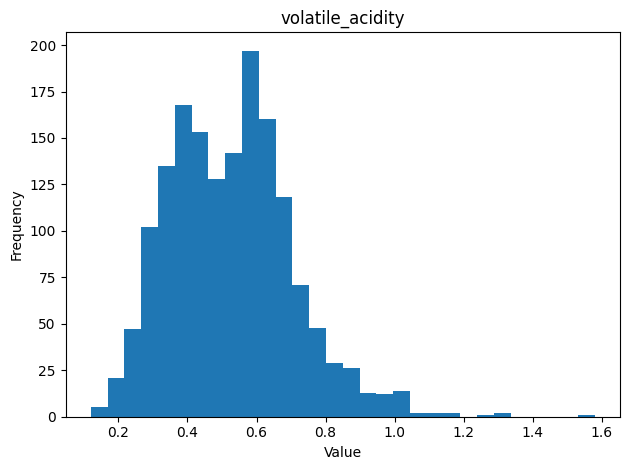

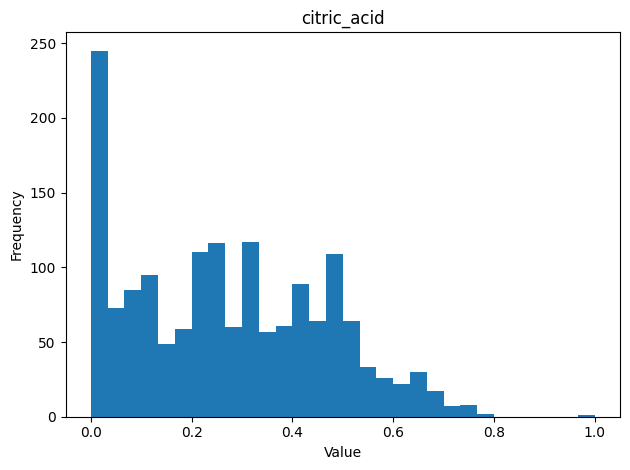

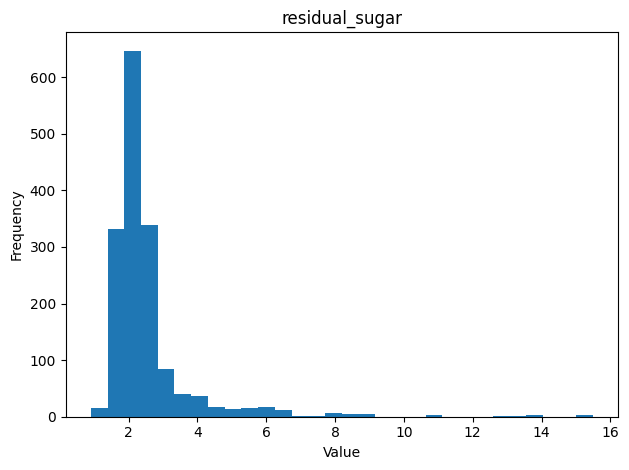

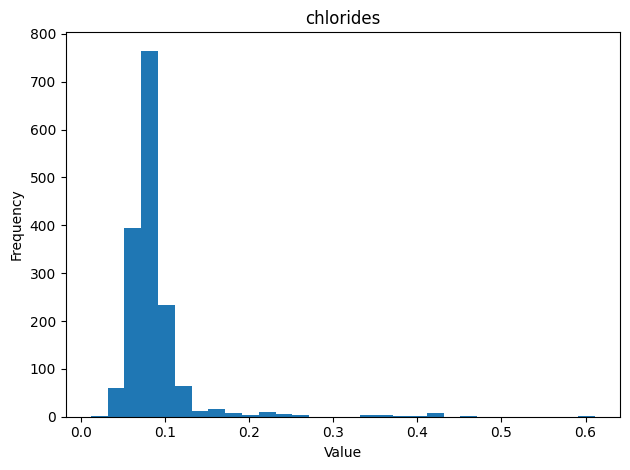

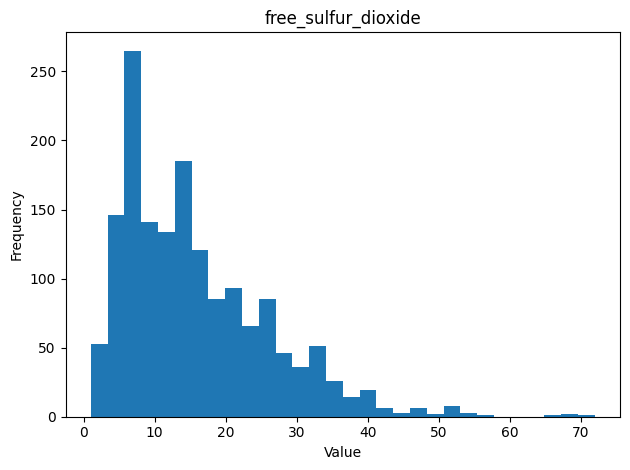

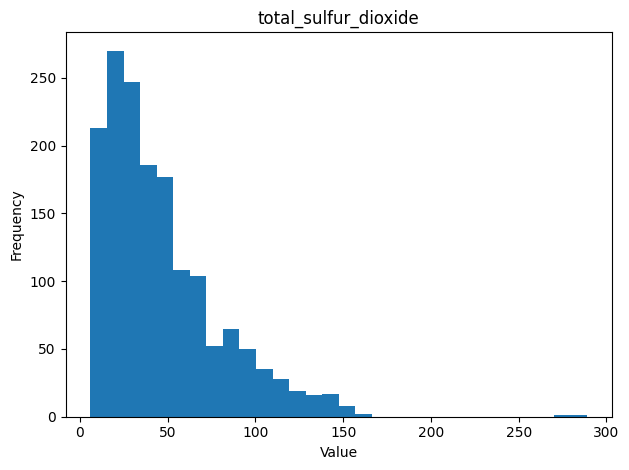

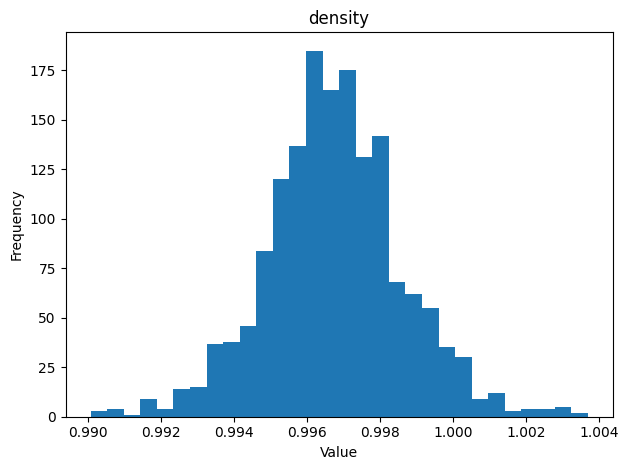

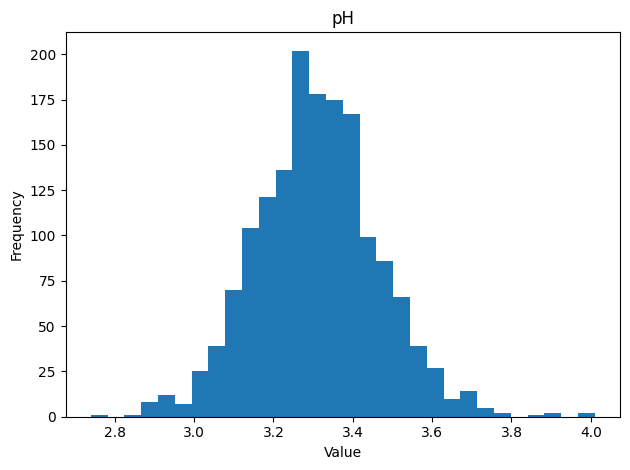

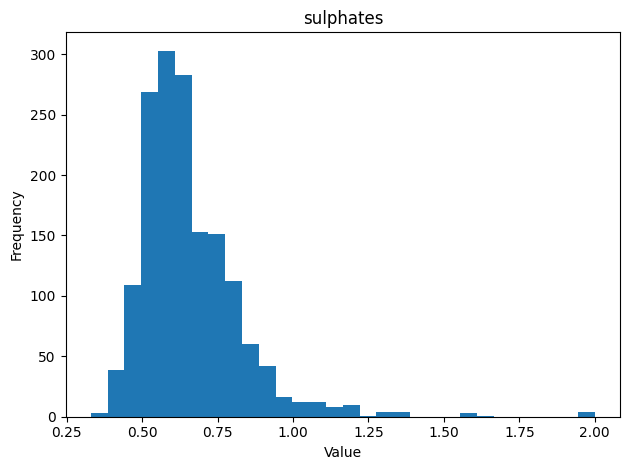

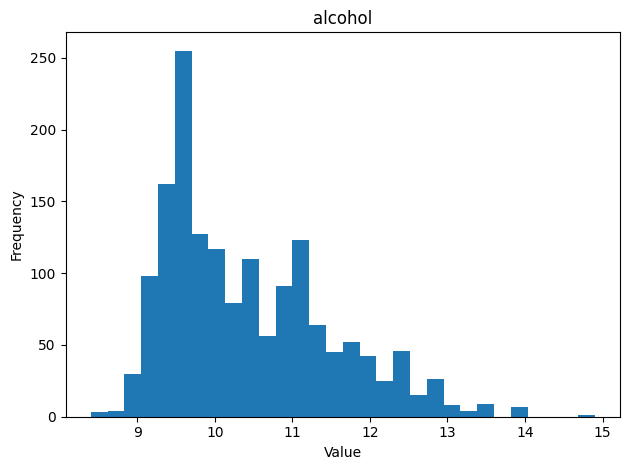

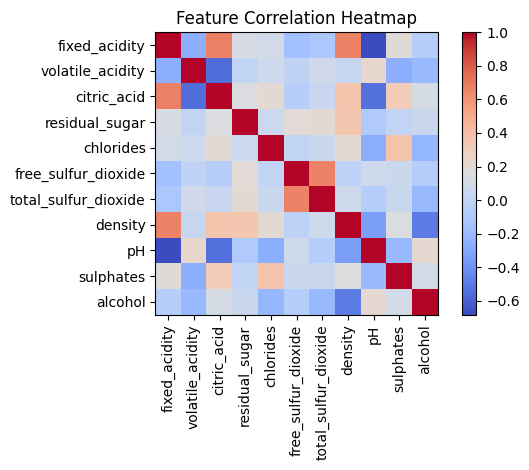

In [9]:
engine.visualize()

## **Observations and Insights**

- Alcohol content shows strong relationships with multiple features, especially density. As alcohol concentration increases, density decreases - which matches expected physical behavior.
- Density is clearly negatively correlated with alcohol, consistent with how ethanol affects liquid density.
- Free sulfur dioxide and total sulfur dioxide are strongly positively correlated, which is expected since total sulfur dioxide includes the free component.
- pH is negatively correlated with fixed acidity, aligning with the chemical relationship between acidity and pH.
- Several acidity-related variables show moderate correlations, suggesting overlapping influence on wine composition rather than isolated effects.

Overall, the observed correlations are consistent with known chemical relationships in wine data, indicating that the statistical computations behave as expected.


## **Effect of Normalization**

Normalization changes the scale of features but does not alter the relationships between them.

As a result:
- Covariance values become more comparable across variables
- Correlation structure remains unchanged
- Relative strengths of relationships are preserved

This demonstrates that normalization improves numerical stability without affecting interpretability.


## **Limitations**

- No categorical feature handling
- Missing values are not automatically handled within the engine.
  Dataset validation was performed manually before analysis.
- No outlier detection logic yet

The purpose is foundational understanding and control.

Future extensions could include automated feature diagnostics.